In [186]:
# Nescessary imports

%matplotlib inline

# supress warnings
import warnings
warnings.filterwarnings('ignore')

import os

# import libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set random seed
random.seed(42)

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
%autoreload 2
from classes.data_wraper import Dataset

In [188]:
data_dir = os.path.join(os.getcwd(), 'data')
paths = {
    'FOVfiting2' : os.path.join(data_dir, 'mapsCeline_FOVfitting_2_pol-60.mat'),
    '3quadrants2' : os.path.join(data_dir, 'mapsCeline_3quadrants_2_pol-60.mat'),
    'FOVfiting3' : os.path.join(data_dir, 'mapsCeline_FOVfitting_3_pol-60.mat'),
    '3quadrants3' : os.path.join(data_dir, 'mapsCeline_3quadrants_3_pol-60.mat'),
    'FOVfiting4' : os.path.join(data_dir, 'mapsCeline_FOVfitting_4_pol-60.mat'),
    '3quadrants4' : os.path.join(data_dir, 'mapsCeline_3quadrants_4_pol-60.mat'),
    'FOVfiting5' : os.path.join(data_dir, 'mapsCeline_FOVfitting_5_pol-60.mat'),
    '3quadrants5' : os.path.join(data_dir, 'mapsCeline_3quadrants_5_pol-60.mat'),
    'FOVfiting6' : os.path.join(data_dir, 'mapsCeline_FOVfitting_6_pol-60.mat'),
    '3quadrants6' : os.path.join(data_dir, 'mapsCeline_3quadrants_6_pol-60.mat'),   
    'FOVfiting9' : os.path.join(data_dir, 'mapsCeline_FOVfitting_9_pol-60.mat'),
    '3quadrants9' : os.path.join(data_dir, 'mapsCeline_3quadrants_9_pol-60.mat'),
    'FOVfiting9a' : os.path.join(data_dir, 'mapsCeline_FOVfitting_9a_polNP.mat'),
    '3quadrants9a' : os.path.join(data_dir, 'mapsCeline_3quadrants_9a_polNP.mat')
}

In [189]:
calibration_maps = [paths['FOVfiting2']]
dataset = Dataset(calibration_maps)

Added data from c:\Users\f076048\Documents\Stage_CSL\data\mapsCeline_FOVfitting_2_pol-60.mat
New lenght: 297


In [190]:
dataset.preprocess_data()

In [213]:
dataset.crop_data(128)

In [192]:
%autoreload 2
from classes.utils import plot_map, plot_radial_profile
from scipy.ndimage import rotate

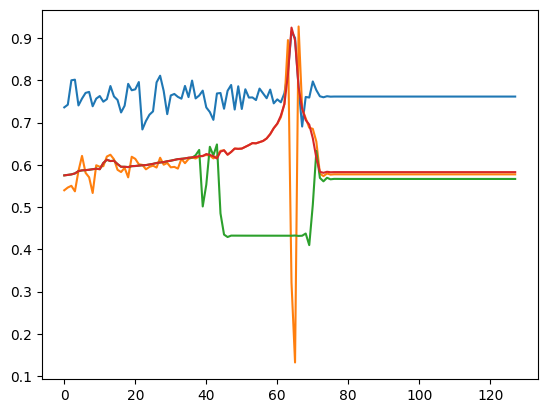

In [241]:
ind = random.randint(0, len(dataset.map1_list)-1)
map1 = dataset.map1_list[ind]
map2 = dataset.map2_list[ind]
map3 = dataset.map3_list[ind]
combined = dataset.combined_list[ind]
azimut = dataset.azimut_list[ind]
plot_radial_profile([map1, map2, map3, combined], azimut)

angle:  392.8631970931908


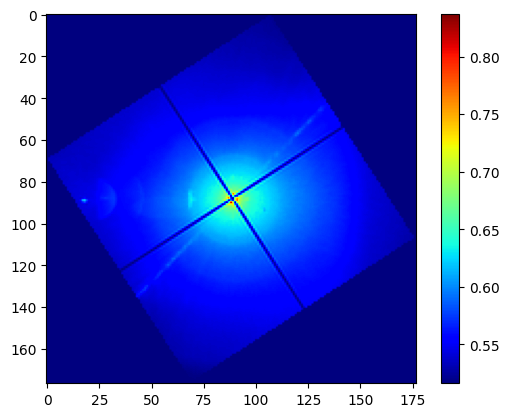

In [225]:
ind = random.randint(0, len(dataset.map1_list)-1)
map = dataset.combined_list[ind]# * 0 +1
map[map.shape[0]//2,:] = np.min(map[map != 0])
map[:, map.shape[0]//2] = np.min(map[map != 0])
angle = dataset.azimut_list[ind] + 90
print('angle: ', angle)
map_rot = rotate(map, angle, reshape=True)
# replace 0 values with min value of not 0 values
map_rot[map_rot == 0] = np.min(map_rot[map_rot != 0])
plt.imshow(map_rot, cmap='jet')
plt.colorbar()
# draw a horizontal line at the center of the map
#plt.axhline(y=map_rot.shape[0]//2, color='r', linestyle='-')
plt.show()